# Multi-strain modeling

The goal of this exercise is to provide an introduction to multi-strain metabolic modeling of the E. coli species. The following is largely take from

"Monk, J. M., Charusanti, P., Aziz, R. K., Lerman, J. a, Premyodhin, N., Orth, J. D., … Palsson, B. Ø. (2013). Genome-scale metabolic reconstructions of multiple Escherichia coli strains highlight strain-specific adaptations to nutritional environments. Proceedings of the National Academy of Sciences, 110(50), 20338–20343. http://doi.org/10.1073/pnas.1307797110" 

In [5]:
import pandas as pd
import glob
from nutrients_for_multistrain import carbon_sources,  strain_classification

----
## A) Simulating growth w/ multi strain models

#### 1) Using the 48 models, simulate growth on the 78 carbon containing nutrients in `carbon_sources`

The carbon sources are listed below

In [3]:
print(carbon_sources)

['12ppd__S_e', '14glucan_e', '3hcinnm_e', '3hpppn_e', '5dglcn_e', 'LalaDgluMdap_e', 'acac_e', 'acgal_e', 'acgal1p_e', 'akg_e', 'all__D_e', 'alltn_e', 'arab__L_e', 'ascb__L_e', 'but_e', 'butso3_e', 'chol_e', 'csn_e', 'cys__D_e', 'etha_e', 'fald_e', 'fe3dcit_e', 'frulys_e', 'fruur_e', 'fuc__L_e', 'g1p_e', 'gal_e', 'gal_bD_e', 'gal1p_e', 'galct__D_e', 'galctn__D_e', 'galctn__L_e', 'galt_e', 'galur_e', 'glcur_e', 'glcur1p_e', 'glyclt_e', 'idon__L_e', 'lyx__L_e', 'malt_e', 'malthx_e', 'maltpt_e', 'malttr_e', 'maltttr_e', 'manglyc_e', 'melib_e', 'orot_e', 'pacald_e', 'peamn_e', 'ppa_e', 'ppal_e', 'pppn_e', 'psclys_e', 'r5p_e', 'rib__D_e', 'rmn_e', 'sbt__D_e', 'sucr_e', 'tartr__D_e', 'trp__L_e', 'uacgam_e', 'udpacgal_e', 'udpg_e', 'udpgal_e', 'udpglcur_e', 'ura_e', 'xan_e', 'xyl__D_e', 'xylu__L_e', '4hphac_e', '4hthr_e', 'oaa_e', 'drib_e', '2pg_e', '3pg_e', '3hoxpac_e', 'galam_e', 'raffin_e', 'arab__D_e']


**Hints:**
  - The models are contained in the `multi_strain_models` directory and their file location can be listed using `glob`:

In [7]:
print(glob.glob('./multi_strain_models/*.json'))

['./multi_strain_models/iEcHS_1320.json', './multi_strain_models/iECSE_1348.json', './multi_strain_models/iECBD_1354.json', './multi_strain_models/iEKO11_1354.json', './multi_strain_models/iEcSMS35_1347.json', './multi_strain_models/iZ_1308.json', './multi_strain_models/iECs_1301.json', './multi_strain_models/iECSP_1301.json', './multi_strain_models/iUTI89_1310.json', './multi_strain_models/iECH74115_1262.json', './multi_strain_models/iECDH10B_1368.json', './multi_strain_models/iWFL_1372.json', './multi_strain_models/iECO103_1326.json', './multi_strain_models/iECP_1309.json', './multi_strain_models/iECD_1391.json', './multi_strain_models/iECO111_1330.json', './multi_strain_models/iG2583_1286.json', './multi_strain_models/iECED1_1282.json', './multi_strain_models/iBWG_1329.json', './multi_strain_models/iECW_1372.json', './multi_strain_models/iJO1366.json', './multi_strain_models/iLF82_1304.json', './multi_strain_models/iEC042_1314.json', './multi_strain_models/iECIAI1_1343.json', './mul

In [227]:
df = pd.DataFrame()
for m in glob.glob('./multi_strain_models/*.json'):
    model = cobra.io.load_json_model(m)
    model.reactions.EX_glc__D_e.lower_bound = 0
    print(model.id, model.name)
    for r_id in carbon:
        if 'EX_' + r_id not in model.reactions:
            continue
        r = model.reactions.get_by_id('EX_' + r_id)
        if r.lower_bound < 0:
            continue
        met_obj = [i for i in r.metabolites.keys()][0]
        if met_obj.formula and 'C' in met_obj.formula:
            r.lower_bound = -10
            df.loc[met_obj.id, model.id] = model.slim_optimize()
            r.lower_bound = 0

iEcHS_1320 Escherichia coli HS
iECSE_1348 Escherichia coli SE11
iECBD_1354 Escherichia coli 'BL21-Gold(DE3)pLysS AG'
iEKO11_1354 Escherichia coli KO11FL
iEcSMS35_1347 Escherichia coli SMS-3-5
iZ_1308 Escherichia coli O157:H7 str. EDL933
iECs_1301 Escherichia coli O157:H7 str. Sakai
iECSP_1301 Escherichia coli O157:H7 str. TW14359
iUTI89_1310 Escherichia coli UTI89
iECH74115_1262 Escherichia coli O157:H7 str. EC4115
iECDH10B_1368 Escherichia coli str. K-12 substr. DH10B
iWFL_1372 Escherichia coli W
iECO103_1326 Escherichia coli O103:H2 str. 12009
iECP_1309 Escherichia coli 536
iECD_1391 Escherichia coli BL21(DE3)
iECO111_1330 Escherichia coli O111:H- str. 11128
iG2583_1286 Escherichia coli O55:H7 str. CB9615
iECED1_1282 Escherichia coli ED1a
iBWG_1329 Escherichia coli BW2952
iECW_1372 Escherichia coli W
iJO1366 Escherichia coli str. K-12 substr. MG1655
iLF82_1304 Escherichia coli LF82
iEC042_1314 Escherichia coli 042
iECIAI1_1343 Escherichia coli IAI1
iECS88_1305 Escherichia coli S88
iE

In [7]:
df = pd.read_csv('ecoli_growth_support.csv', index_col=0)

In [41]:
len(df.columns)

46

In [42]:
len(df.index)

78

In [40]:
df

,iEcHS_1320,iECSE_1348,iECBD_1354,iEKO11_1354,iEcSMS35_1347,iZ_1308,iECs_1301,iECSP_1301,iUTI89_1310,iECH74115_1262,...,iY75_1357,iEcolC_1368,iUMNK88_1353,iECABU_c1320,iNRG857_1313,iEcDH1_1363,iECIAI39_1322,iECO26_1355,iECSF_1327,iEC55989_1330
12ppd__S_e,0.536276,0.536276,0.536276,0.536276,0.536276,0.536276,0.536276,0.536276,0.536276,0.536276,...,0.536276,0.536276,0.536276,0.536276,0.536276,0.536276,NaN,0.536276,0.536276,0.536276
14glucan_e,6.043165,6.043165,5.997901,6.043165,6.043165,6.043165,6.043165,6.043165,6.043165,6.043165,...,6.043165,6.043165,6.043165,6.043165,6.043165,6.043165,6.045395,6.043165,6.043165,6.043165
3hcinnm_e,1.148489,1.148489,1.148489,1.148489,1.148489,1.148489,1.148489,1.148489,NaN,1.148489,...,1.148489,1.148489,1.148489,NaN,NaN,1.148489,1.148929,1.148489,1.148489,1.148489
3hpppn_e,1.188527,1.188527,1.188527,1.188527,1.188527,1.188527,1.188527,1.188527,NaN,1.188527,...,1.188527,1.188527,1.188527,NaN,NaN,1.188527,1.188982,1.188527,1.188527,1.188527
5dglcn_e,0.816554,NaN,0.810894,0.816554,0.816554,NaN,NaN,NaN,0.816554,NaN,...,0.816554,NaN,NaN,0.816554,0.816554,0.816554,0.816856,NaN,0.816554,0.816554
LalaDgluMdap_e,1.191263,1.191263,1.191263,1.191263,1.191263,1.191263,1.191263,1.191263,1.191263,1.191263,...,1.191263,1.191263,1.191263,1.191263,1.191263,1.191263,1.191731,1.191263,1.191263,1.191263
acac_e,0.547368,NaN,0.547368,NaN,0.547368,NaN,NaN,NaN,0.547368,NaN,...,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547582,NaN,0.547368,NaN
acgal_e,0.973519,0.973519,0.972201,0.973519,0.973519,0.973519,0.973519,0.973519,0.973519,NaN,...,NaN,0.973519,0.973519,0.973519,0.973519,NaN,0.973882,0.973519,0.973519,0.973519
acgal1p_e,0.973519,0.973519,0.972201,0.973519,0.973519,0.973519,0.973519,0.973519,0.973519,NaN,...,NaN,0.973519,0.973519,0.973519,0.973519,NaN,0.973882,0.973519,0.973519,0.973519
akg_e,NaN,0.617986,0.617986,0.617986,0.617986,0.617986,0.617986,0.617986,0.617986,0.617986,...,0.617986,0.617986,0.617986,0.617986,0.617986,0.617986,0.618223,0.617986,0.617986,0.617986


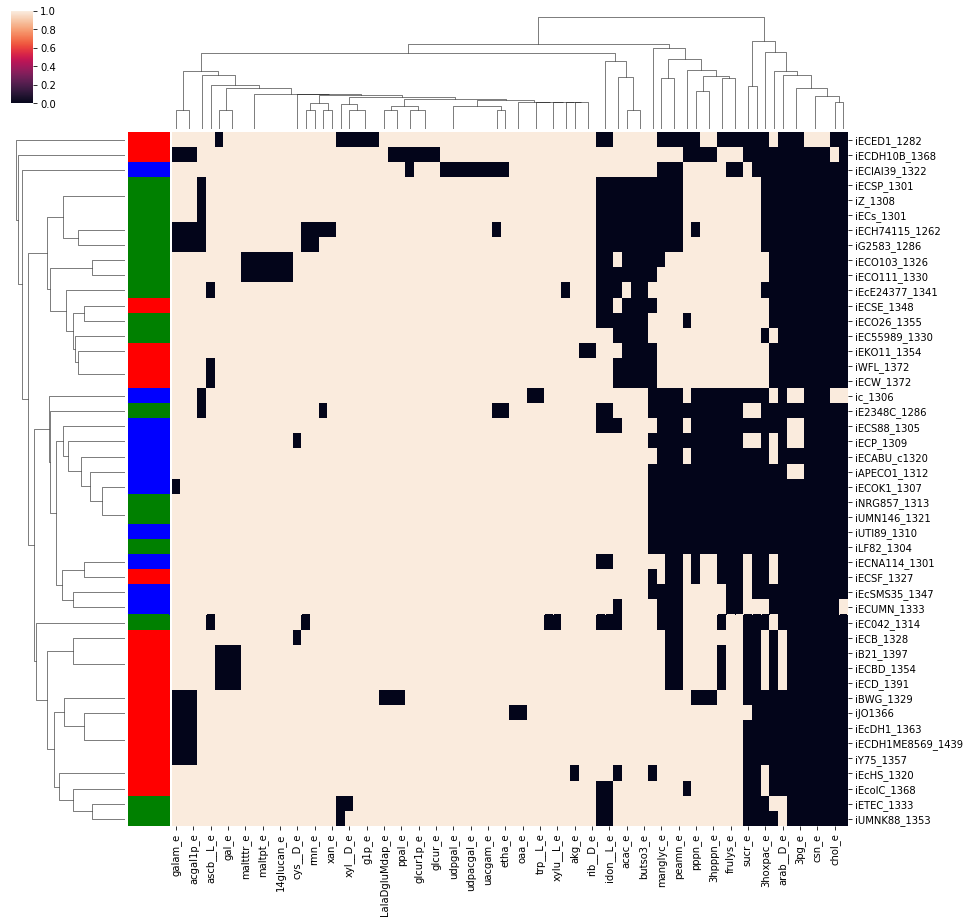

In [37]:
%matplotlib inline
import seaborn as sns
sns.clustermap(test_df,  figsize=(15, 15), row_colors=row_colors)

In [25]:
test_df = df.copy()
test_df.fillna(0, inplace=True)

In [26]:
test_df[test_df < .1] = 0
test_df[test_df >= .1] = 1
test_df = test_df.T

In [20]:
color_dict = {}
map_dict = {'Commensal': 'r', 'ExPec': 'b', 'InPec': 'g'}
for strain in strain_classification:
    color_dict[strain] =  map_dict[strain_classification[strain]]

In [34]:
sns.clustermap?

In [235]:

row_colors = test_df.index.map(color_dict)
g = sns.clustermap(iris, row_colors=row_colors)

In [17]:
map_dict = {'Commensal': 0, 'ExPec': 1, 'InPec': 2}
targets = []
for i in test_df.index:
    targets.append(map_dict[use_dict[i]])

NameError: name 'use_dict' is not defined

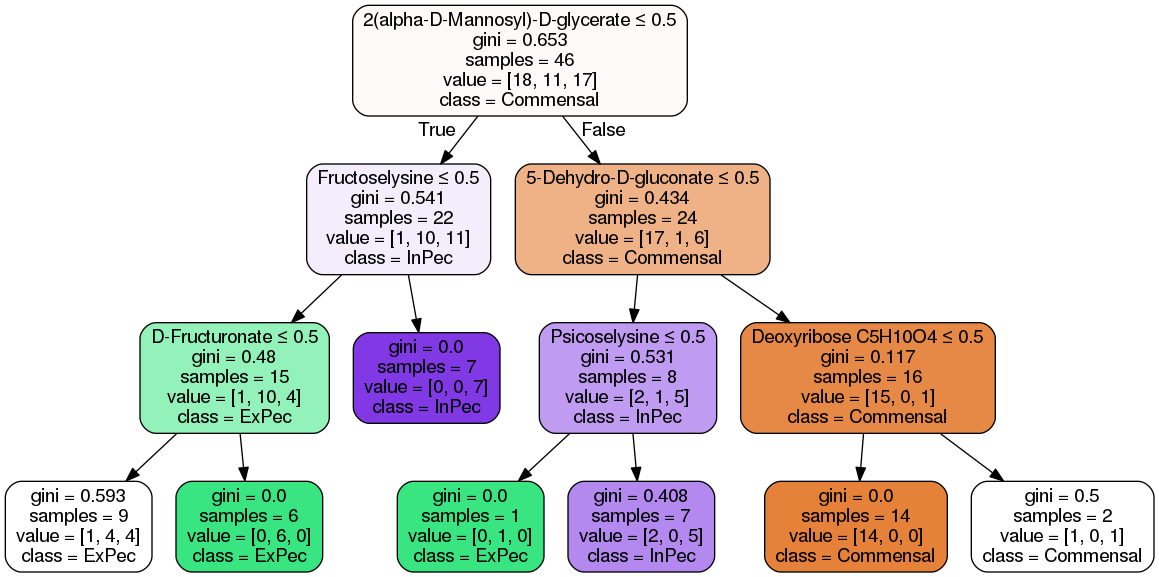

In [240]:
from IPython.display import Image 
import pydotplus
from sklearn.externals.six import StringIO  
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
y = targets
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(test_df, y)

import graphviz 
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=[model.metabolites.get_by_id(i).name for i in test_df.columns],
                class_names = list(map_dict.keys())) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [241]:
tree.export_graphviz?

In [205]:
test_df.columns[44]

'manglyc_e'

In [204]:
test_df['psclys_e']

iEcHS_1320           1.0
iECSE_1348           1.0
iECBD_1354           1.0
iEKO11_1354          1.0
iEcSMS35_1347        0.0
iZ_1308              1.0
iECs_1301            1.0
iECSP_1301           1.0
iUTI89_1310          0.0
iECH74115_1262       1.0
iECDH10B_1368        1.0
iWFL_1372            1.0
iECO103_1326         1.0
iECP_1309            0.0
iECD_1391            1.0
iECO111_1330         1.0
iG2583_1286          1.0
iECED1_1282          0.0
iBWG_1329            1.0
iECW_1372            1.0
iJO1366              1.0
iLF82_1304           0.0
iEC042_1314          1.0
iECS88_1305          0.0
iECUMN_1333          0.0
iEcE24377_1341       1.0
iECB_1328            1.0
iETEC_1333           1.0
iECOK1_1307          0.0
ic_1306              0.0
iAPECO1_1312         0.0
iECDH1ME8569_1439    1.0
iECNA114_1301        0.0
iB21_1397            1.0
iE2348C_1286         0.0
iUMN146_1321         0.0
iY75_1357            1.0
iEcolC_1368          1.0
iUMNK88_1353         1.0
iECABU_c1320         0.0


In [161]:
test_df[test_df < .1] = np.nan
test_df.dropna(how='all', inplace=True)
test_df.fillna(0, inplace=True)
test_df[test_df >= .1] = np.nan
test_df.dropna(how='all', inplace=True)
test_df.fillna(1, inplace=True)

In [167]:
list(test_df.index)

['12ppd__S_e',
 '14glucan_e',
 '3hcinnm_e',
 '3hpppn_e',
 '5dglcn_e',
 'LalaDgluMdap_e',
 'acac_e',
 'acgal_e',
 'acgal1p_e',
 'akg_e',
 'all__D_e',
 'alltn_e',
 'arab__L_e',
 'ascb__L_e',
 'but_e',
 'butso3_e',
 'chol_e',
 'csn_e',
 'cys__D_e',
 'etha_e',
 'fald_e',
 'fe3dcit_e',
 'frulys_e',
 'fruur_e',
 'fuc__L_e',
 'g1p_e',
 'gal_e',
 'gal_bD_e',
 'gal1p_e',
 'galct__D_e',
 'galctn__D_e',
 'galctn__L_e',
 'galt_e',
 'galur_e',
 'glcur_e',
 'glcur1p_e',
 'glyclt_e',
 'idon__L_e',
 'lyx__L_e',
 'malt_e',
 'malthx_e',
 'maltpt_e',
 'malttr_e',
 'maltttr_e',
 'manglyc_e',
 'melib_e',
 'orot_e',
 'pacald_e',
 'peamn_e',
 'ppa_e',
 'ppal_e',
 'pppn_e',
 'psclys_e',
 'r5p_e',
 'rib__D_e',
 'rmn_e',
 'sbt__D_e',
 'sucr_e',
 'tartr__D_e',
 'trp__L_e',
 'uacgam_e',
 'udpacgal_e',
 'udpg_e',
 'udpgal_e',
 'udpglcur_e',
 'ura_e',
 'xan_e',
 'xyl__D_e',
 'xylu__L_e',
 '4hphac_e',
 '4hthr_e',
 'oaa_e',
 'drib_e',
 '2pg_e',
 '3pg_e',
 '3hoxpac_e',
 'galam_e',
 'raffin_e',
 'arab__D_e']